In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df=pd.read_csv('/content/dataset (1).csv')

In [3]:
df.head()

VIN (1-10)     County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N     Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D      Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B     Yakima    Yakima    WA        98901        2011     NISSAN   
3  1G1FW6S08H     Skagit  Concrete    WA        98237        2017  CHEVROLET   
4  3FA6P0SU1K  Snohomish   Everett    WA        98201        2019       FORD   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   
3     BOLT EV          Battery Electric Vehicle (BEV)   
4      FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   
3           Clean Alternative Fuel Vehicle Eligible             238   
4             Not eligible due to low battery range              26   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   
3          0                  39.0       186750406   
4          0                  38.0         2006714   

              Vehicle Location        Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)                     NaN        12087972100  
1  POINT (-114.57245 35.16815)                     NaN        32003005702  
2  POINT (-120.50721 46.60448)              PACIFICORP        53077001602  
3   POINT (-121.7515 48.53892)  PUGET SOUND ENERGY INC        53057951101  
4  POINT (-122.20596 47.97659)  PUGET SOUND ENERGY INC        53061041500

In [4]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.484142e+08       5.303301e+10  
50%               34.000000    1.923896e+08       5.303303e+10  
75%               43.000000    2.191899e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [6]:
df.shape

(112634, 17)

In [7]:
df.isna().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

In [8]:
df['Model'] = df['Model'].fillna(df['Model'].mode()[0])
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].mean())
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['Vehicle Location'].mode()[0])
df['Electric Utility'] = df['Electric Utility'].fillna(df['Electric Utility'].mode()[0])

In [9]:
df.isna().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# Univariate Analysis

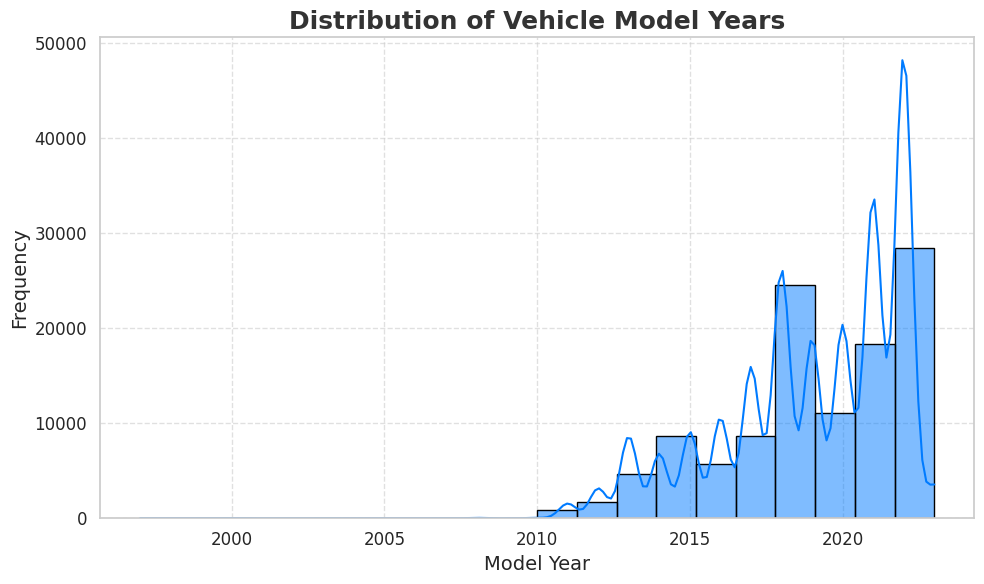

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create the histogram with KDE, changing the color code to a blue shade
sns.histplot(df['Model Year'], bins=20, kde=True, color='#007BFF', edgecolor='black')

# Set the title and labels with enhanced styles
plt.title('Distribution of Vehicle Model Years', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Model Year', fontsize=14, fontweight='medium')
plt.ylabel('Frequency', fontsize=14, fontweight='medium')

# Customize tick parameters for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for easier interpretation of data
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


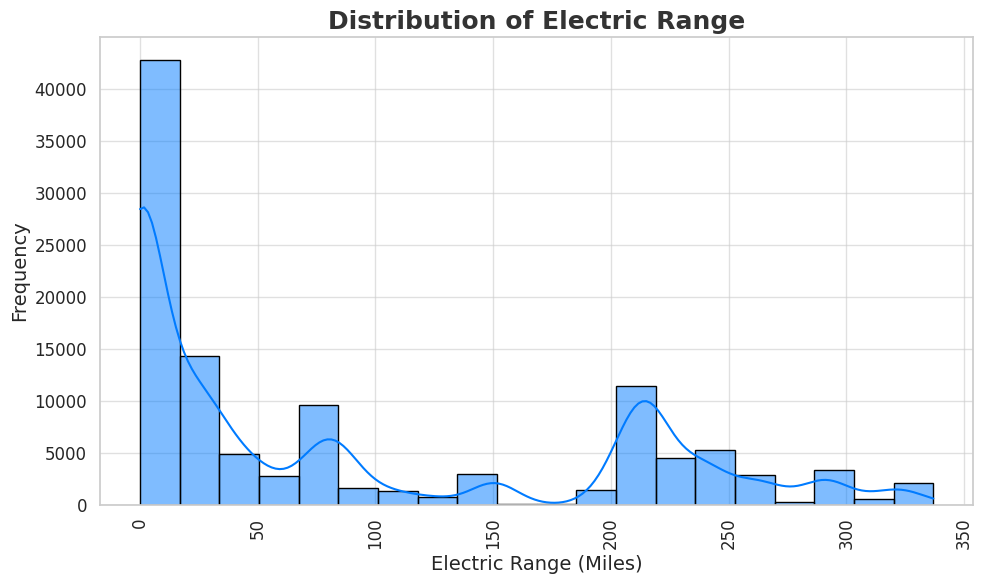

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='whitegrid')

# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Create the histogram with KDE, using the specified purple color
sns.histplot(df['Electric Range'], bins=20, kde=True, color='#007BFF', edgecolor='black')

# Set the title and labels with enhanced styles
plt.title('Distribution of Electric Range', fontsize=18, fontweight='bold', color='#333')
plt.xlabel('Electric Range (Miles)', fontsize=14, fontweight='medium')
plt.ylabel('Frequency', fontsize=14, fontweight='medium')

# Customize tick parameters for better readability
plt.xticks(rotation=90, fontsize=12)  # Rotate x-ticks for better visibility
plt.yticks(fontsize=12)

# Add a grid for easier interpretation of data
plt.grid(True, linestyle='solid', alpha=0.6)

# Show the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


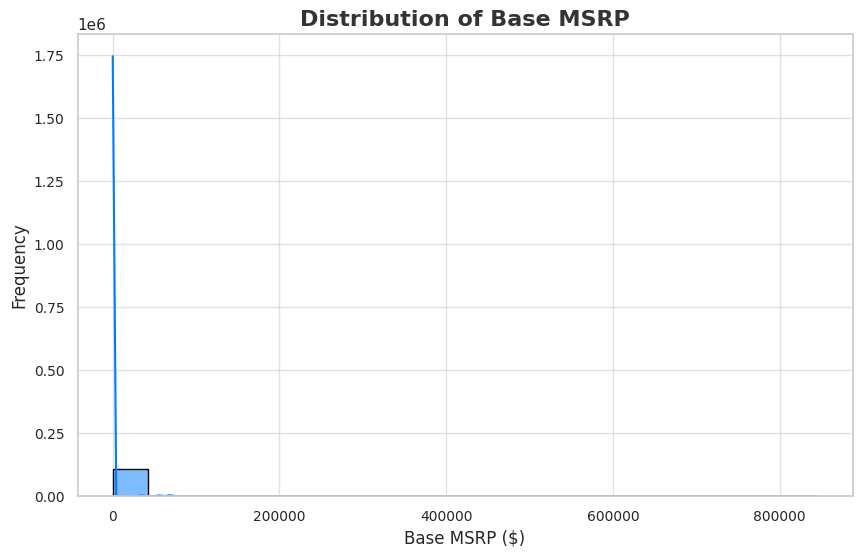

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Base MSRP'], bins=20, kde=True, color='#007BFF', edgecolor='black')  # New color: '#800000' (maroon)
plt.title('Distribution of Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

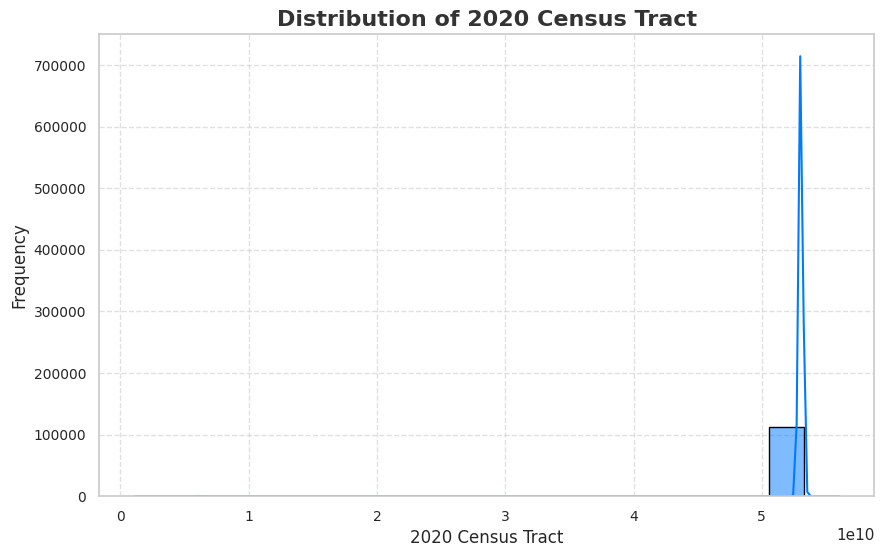

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['2020 Census Tract'], bins=20, kde=True, color='#007BFF', edgecolor='black')
plt.title('Distribution of 2020 Census Tract', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('2020 Census Tract', fontsize=12, fontweight='medium')
plt.ylabel('Frequency', fontsize=12, fontweight='medium')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Bivariate Analysis

<ipython-input-14-59c54248bc2e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')  # Using a visually appealing palette 'Set2'


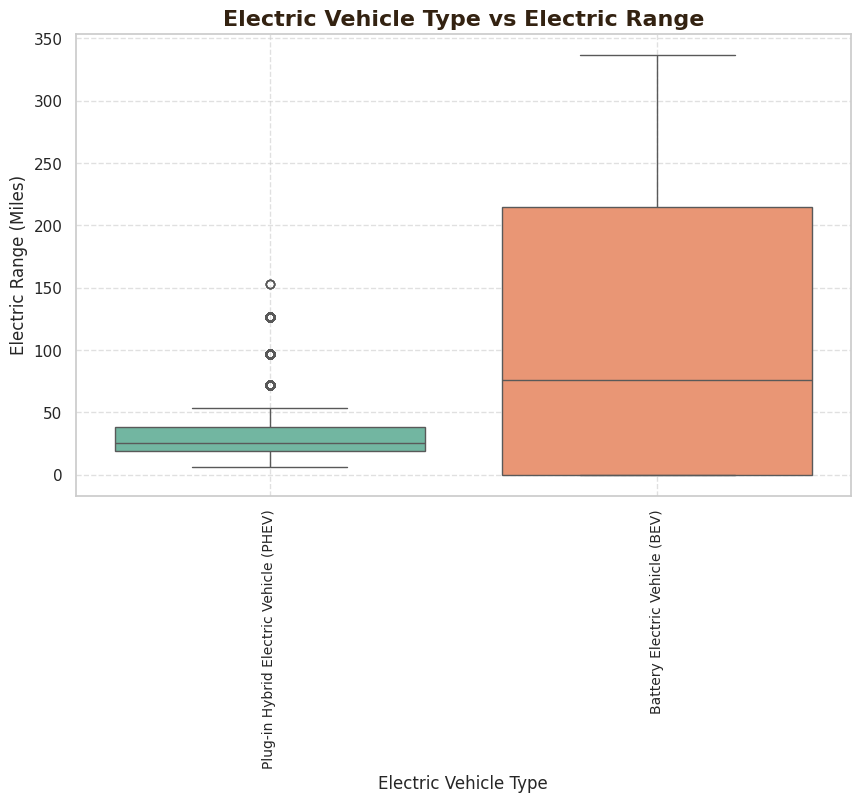

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')  # Using a visually appealing palette 'Set2'
plt.title('Electric Vehicle Type vs Electric Range', fontsize=16, fontweight='bold', color='#321')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Electric Range (Miles)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-15-69a236f9f58a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='Base MSRP', data=df[df['Make'].isin(top_makes)], palette='coolwarm')  # Using 'coolwarm' palette for contrast


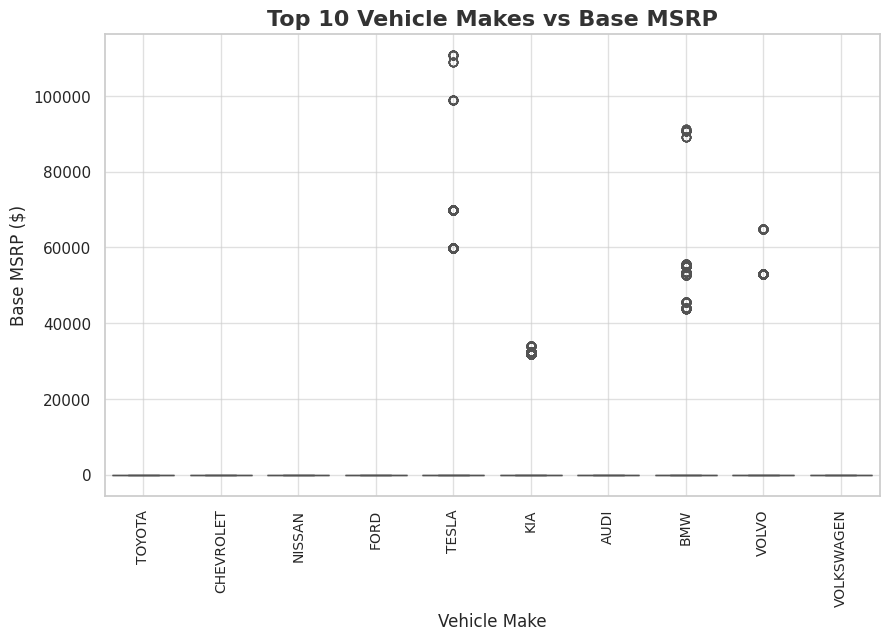

In [15]:
plt.figure(figsize=(10, 6))
top_makes = df['Make'].value_counts().nlargest(10).index
sns.boxplot(x='Make', y='Base MSRP', data=df[df['Make'].isin(top_makes)], palette='coolwarm')  # Using 'coolwarm' palette for contrast
plt.title('Top 10 Vehicle Makes vs Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Vehicle Make', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

<ipython-input-16-78abf30f8905>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=df, palette='viridis')  # Using 'viridis' palette for a vibrant color scheme


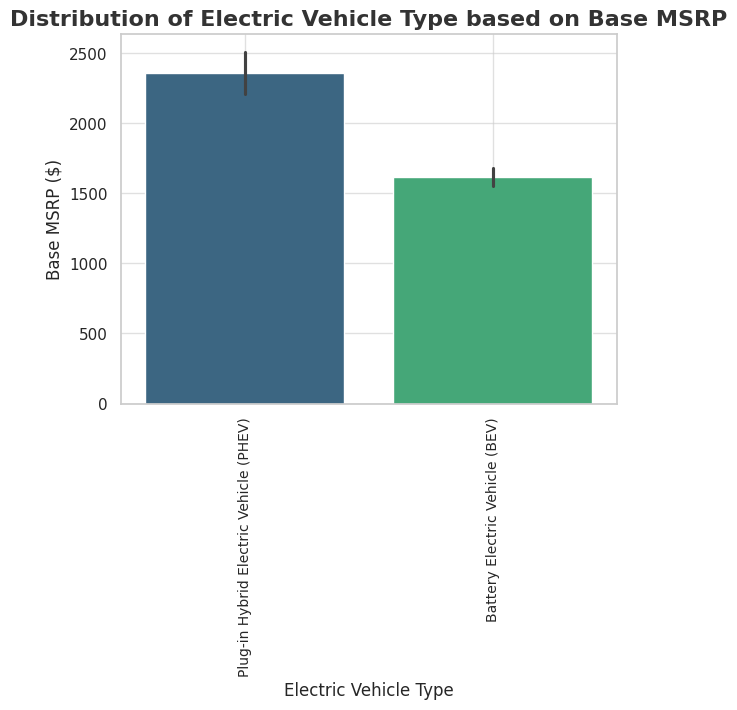

In [16]:
sns.barplot(x='Electric Vehicle Type', y='Base MSRP', data=df, palette='viridis')  # Using 'viridis' palette for a vibrant color scheme
plt.title('Distribution of Electric Vehicle Type based on Base MSRP', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Base MSRP ($)', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(True, linestyle='solid', alpha=0.6)
plt.show()

<ipython-input-17-7a76585c16ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Electric Vehicle Type', y='Model Year', data=df, palette='plasma')  # Using 'plasma' for vibrant colors


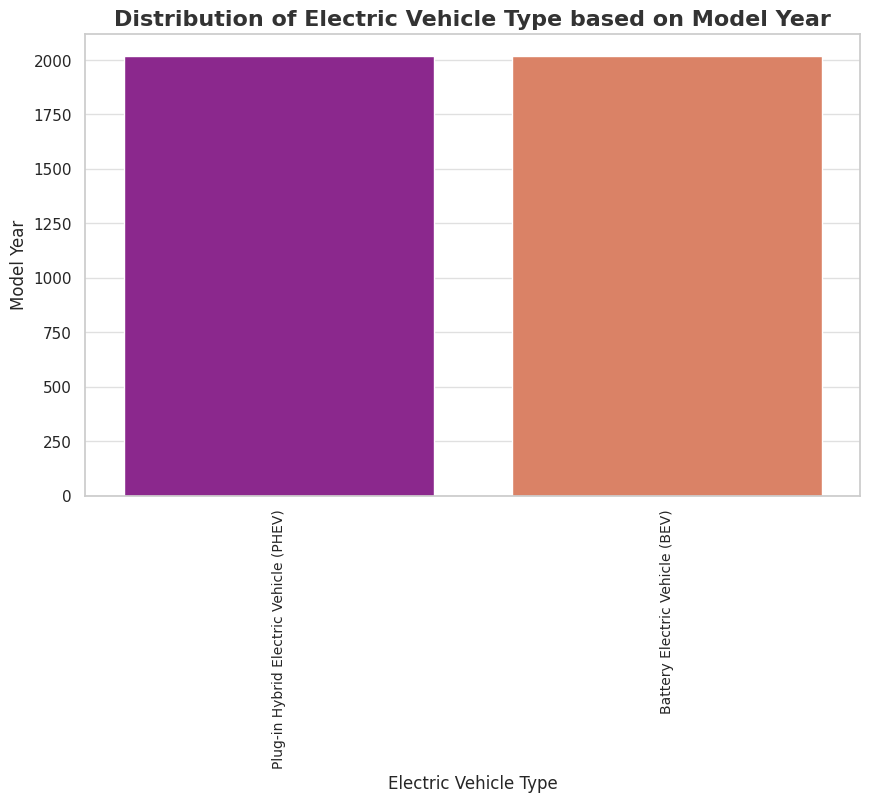

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Electric Vehicle Type', y='Model Year', data=df, palette='plasma')  # Using 'plasma' for vibrant colors
plt.title('Distribution of Electric Vehicle Type based on Model Year', fontsize=16, fontweight='bold', color='#333')
plt.xlabel('Electric Vehicle Type', fontsize=12, fontweight='medium')
plt.ylabel('Model Year', fontsize=12, fontweight='medium')
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='solid', alpha=0.6)
plt.show()

In [18]:
import plotly.express as px

state_data = df.groupby('State')['VIN (1-10)'].count().reset_index()
state_data.columns = ['State', 'EV Count']

fig = px.choropleth(state_data,
                    locations='State',
                    locationmode='USA-states',
                    color='EV Count',
                    color_continuous_scale='Purples',
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State')

fig.show()

In [19]:
import plotly.express as px

# Group the data by state and count the number of EVs
count_by_state = df.groupby("State").size().reset_index(name="count")

fig = px.choropleth(
    count_by_state,
    locations="State",
    color="count",
    locationmode="USA-states",
    scope="usa",
    labels={"count": "NO OF EV's"},
    title="Number of EVs by State"
)

fig.update_layout(
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    title_x=0.5
)

fig.show()

In [20]:
import plotly.express as px

fig = px.box(df,
             x='Electric Vehicle Type',
             y='Base MSRP',
             title='Box Plot of Base MSRP by Electric Vehicle Type',
             labels={'Base MSRP': 'Base MSRP ($)', 'Electric Vehicle Type': 'EV Type'},
             hover_data=['Make', 'Model'])

fig.update_layout(
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=40, b=40)
)

fig.show()

In [32]:
import plotly.express as px

vehicle_type_count = df.groupby('Electric Vehicle Type')['VIN (1-10)'].count().reset_index()
vehicle_type_count.columns = ['Electric Vehicle Type', 'Count']

fig = px.pie(vehicle_type_count,
             names='Electric Vehicle Type',
             values='Count',
             title='Distribution of Electric Vehicles by Type',
             labels={'Electric Vehicle Type': 'EV Type', 'Count': 'Number of Vehicles'},
             hole=0.3,
             color_discrete_sequence=px.colors.sequential.Bluered)

fig.update_traces(textinfo='percent+label')
fig.update_layout(title_font_size=20,
                  margin=dict(l=40, r=40, t=40, b=40))

fig.show()

In [22]:
!pip install bar-chart-race


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 9.8 MB/s eta 0:00:00


In [23]:
import plotly.express as px
import warnings

make_year_data = df.groupby(['Model Year', 'Make'])['VIN (1-10)'].count().reset_index()
make_year_data.columns = ['Model Year', 'Make', 'Count']

fig = px.bar(make_year_data,
             x='Make',
             y='Count',
             color='Make',
             animation_frame='Model Year',
             animation_group='Make',
             range_y=[0, make_year_data['Count'].max() + 50],
             title='Electric Vehicle Makes Over Time',
             labels={'Count': 'Number of Vehicles', 'Make': 'EV Make'},
             text='Count')

fig.update_layout(title_font_size=20,
                  xaxis_title_font_size=14,
                  yaxis_title_font_size=14,
                  legend_title_text='Electric Vehicle Make',
                  margin=dict(l=40, r=40, t=40, b=40))


fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [24]:
import bar_chart_race as bcr
df.columns


Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [25]:
car_per_year = df.groupby(['Make', 'Model Year']).size().reset_index(name='number_of_Vehicles')

print(car_per_year)

      Make  Model Year  number_of_Vehicles
0     AUDI        2016                 214
1     AUDI        2017                 187
2     AUDI        2018                 174
3     AUDI        2019                 392
4     AUDI        2020                 224
..     ...         ...                 ...
204  VOLVO        2019                 190
205  VOLVO        2020                 162
206  VOLVO        2021                 580
207  VOLVO        2022                 882
208  VOLVO        2023                  21

[209 rows x 3 columns]


In [26]:
# Create the animated racing bar plot with annotations
fig = px.bar(car_per_year,
             y='Make',
             x='number_of_Vehicles',
             color='Make',
             animation_frame='Model Year',
             orientation='h',
             title='EV Makes and their Count Over the Years',
             labels={'Number_of_Vehicles': 'Number of EV Vehicles'},
             range_x=[0, 3000]
            )

fig.update_traces(texttemplate='%{x}',
                  textposition='outside',
                  textfont_size=16)

# Adjust the layout for improved visibility and emphasis on movement
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis_title='EV Makes',
    xaxis_title='Number of EV Vehicles',
    showlegend=False,
    title_x=0.5,
    title_font=dict(size=20),
    margin=dict(l=50, r=50, t=50, b=50),
    width=800,
    height=600
)

fig.show()